In [31]:
import cv2
import torch
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

In [19]:
# Создаем конфигурацию и загружаем веса модели
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))  # Путь к файлу конфигурации модели
cfg.MODEL.WEIGHTS = "./output/model_final.pth"  # Путь к файлу с весами модели
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # Устанавливаем пороговое значение для детекции объектов
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [20]:
# Строим модель и загружаем веса
model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

{'trainer': {'iteration': 1019,
  'hooks': {'LRScheduler': {'base_lrs': [0.00025], 'last_epoch': 1020}},
  '_trainer': {'iteration': 1019,
   'optimizer': {'state': {0: {'momentum_buffer': tensor([[[[-0.0074]],
      
               [[-0.0005]],
      
               [[ 0.0006]],
      
               ...,
      
               [[-0.0022]],
      
               [[-0.0026]],
      
               [[-0.0024]]],
      
      
              [[[-0.0030]],
      
               [[ 0.0034]],
      
               [[ 0.0029]],
      
               ...,
      
               [[ 0.0008]],
      
               [[ 0.0038]],
      
               [[ 0.0031]]],
      
      
              [[[ 0.0044]],
      
               [[-0.0004]],
      
               [[ 0.0001]],
      
               ...,
      
               [[ 0.0003]],
      
               [[ 0.0096]],
      
               [[ 0.0036]]],
      
      
              ...,
      
      
              [[[-0.0215]],
      
              

In [21]:
# Создаем предиктор
predictor = DefaultPredictor(cfg)

In [22]:
# Загружаем изображение для детекции объектов
image = "./test.png"
im = cv2.imread(image)

In [23]:
# Используем модель для предсказаний на изображении
outputs = predictor(im)

In [27]:
metadata = MetadataCatalog.get("colonies_train")
metadata.thing_classes = ["S.aureus", "B.subtilis", "P.aeruginosa", "E.coli", "C.albicans", "Defect", "Contamination"]

In [28]:
# Create a Visualizer instance
v = Visualizer(im[:, :, ::-1], metadata)

In [29]:
# Draw the predictions on the image
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

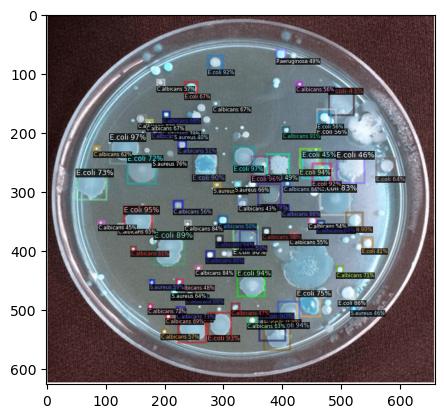

In [30]:
plt.imshow(out.get_image()[:, :, ::-1])

In [14]:
# Выводим результаты детекции
print(outputs["instances"].pred_classes)  # Классы предсказанных объектов
print(outputs["instances"].pred_boxes)  # Координаты предсказанных объектов

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 0, 3,
        3, 4, 3, 0, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 0, 4, 3, 4,
        4, 4, 0, 4, 4, 3, 4, 3, 4, 4, 4, 0, 4, 4, 3, 4, 4])
Boxes(tensor([[317.7428, 224.8844, 351.5292, 258.2514],
        [108.1464, 203.4149, 152.0470, 252.5319],
        [224.4380, 511.8569, 270.1777, 556.1846],
        [347.6068, 241.0098, 377.9013, 274.7497],
        [132.1371, 326.3809, 179.2021, 372.3900],
        [323.8408, 435.4109, 369.6150, 477.9839],
        [430.4201, 228.4752, 464.0056, 264.0995],
        [393.1910, 486.5149, 429.2903, 523.4302],
        [273.5026, 506.0232, 312.9509, 544.6472],
        [273.8445,  69.9556, 299.2032,  95.4421],
        [451.3202, 252.7393, 482.0096, 283.6369],
        [400.8116, 190.5356, 412.0426, 202.8915],
        [316.6870, 359.7361, 357.5768, 399.4855],
        [360.6462, 507.5110, 405.3621, 552.8618],
        [248.2879, 233.5440, 291.1534, 272.7461],
        [508.0114, 336.4

In [15]:
outputs

{'instances': Instances(num_instances=65, image_height=627, image_width=659, fields=[pred_boxes: Boxes(tensor([[317.7428, 224.8844, 351.5292, 258.2514],
         [108.1464, 203.4149, 152.0470, 252.5319],
         [224.4380, 511.8569, 270.1777, 556.1846],
         [347.6068, 241.0098, 377.9013, 274.7497],
         [132.1371, 326.3809, 179.2021, 372.3900],
         [323.8408, 435.4109, 369.6150, 477.9839],
         [430.4201, 228.4752, 464.0056, 264.0995],
         [393.1910, 486.5149, 429.2903, 523.4302],
         [273.5026, 506.0232, 312.9509, 544.6472],
         [273.8445,  69.9556, 299.2032,  95.4421],
         [451.3202, 252.7393, 482.0096, 283.6369],
         [400.8116, 190.5356, 412.0426, 202.8915],
         [316.6870, 359.7361, 357.5768, 399.4855],
         [360.6462, 507.5110, 405.3621, 552.8618],
         [248.2879, 233.5440, 291.1534, 272.7461],
         [508.0114, 336.4302, 535.6670, 361.4368],
         [183.0247, 368.9172, 233.5226, 423.7104],
         [495.3857, 458.5205, 5